## **CORRELAÇÃO**

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/curso_estatistica_python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [3]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [4]:
colegiox.shape

(41, 28)

In [7]:
# Lista com nota final
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [14]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,nota_final
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,46.3,447.2,557.3,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim,385.58
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,505.9,534.5,529.8,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não,548.42
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,449.4,436.4,45.8,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não,399.60
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,468.6,606.1,576.6,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim,446.16
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,414.3,553.7,49.5,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim,433.62


In [ ]:
notas_colegiox = colegiox[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]

In [ ]:
notas_colegiox

### Gráfico correlação

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(notas_colegiox)

In [ ]:
import matplotlib.pyplot as plt

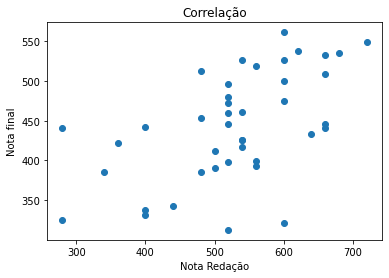

In [ ]:
plt.scatter(notas_colegiox.NOTA_REDACAO,notas_colegiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota final')
plt.grid(False)
plt.show()

In [ ]:
correlacoes = notas_colegiox.corr(method='spearman')
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,-0.206620,0.118293,0.320049,0.244312,0.546864
NOTA_MT,-0.206620,1.000000,0.022997,-0.178841,0.021279,0.134843
NOTA_LC,0.118293,0.022997,1.000000,0.336077,0.247201,0.352613
NOTA_CH,0.320049,-0.178841,0.336077,1.000000,0.437328,0.674158
NOTA_REDACAO,0.244312,0.021279,0.247201,0.437328,1.000000,0.556488
nota_final,0.546864,0.134843,0.352613,0.674158,0.556488,1.000000


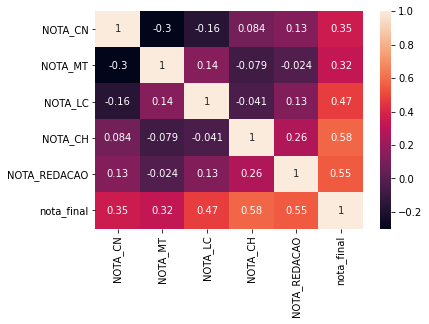

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

### Análise da Normalidade

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import scipy.stats as stats

In [ ]:
# Nota de redação
stats.shapiro(notas_colegiox.NOTA_REDACAO)

(0.952975869178772, 0.08905196189880371)

In [ ]:
# Nota final
stats.shapiro(notas_colegiox.nota_final)

(0.9638935923576355, 0.2148178666830063)

In [ ]:
# Nota de Matemática
stats.shapiro(notas_colegiox.NOTA_MT)

(0.798567533493042, 5.104646334075369e-06)

In [ ]:
# Nota de Ciências da Natureza
stats.shapiro(notas_colegiox.NOTA_CN)

(0.7349029779434204, 2.995314787312964e-07)

In [ ]:
# Nota de Linguagem e Códigos
stats.shapiro(notas_colegiox.NOTA_LC)

(0.598617434501648, 2.23514540209635e-09)

In [ ]:
# Nota de Ciências Humanas
stats.shapiro(notas_colegiox.NOTA_CH)

(0.7509256601333618, 5.865637717761274e-07)

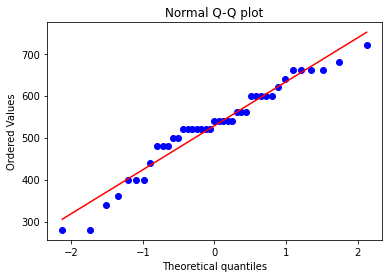

In [ ]:
stats.probplot(notas_colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Análise dos Outliers

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.box(notas_colegiox, y="NOTA_REDACAO")
grafico.show()

In [ ]:
grafico = px.box(notas_colegiox, y="NOTA_MT")
grafico.show()

In [ ]:
grafico = px.box(notas_colegiox, y="NOTA_CN")
grafico.show()

In [ ]:
grafico = px.box(notas_colegiox, y="NOTA_CH")
grafico.show()

In [ ]:
grafico = px.box(notas_colegiox, y="NOTA_LC")
grafico.show()

In [ ]:
grafico = px.box(notas_colegiox, y="nota_final")
grafico.show()

## **REGRESSÃO**

### Regressão Linear com Statsmodels

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_colegiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           0.000188
Time:                        18:32:49   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749


Equação:

Nota Final = 251,678855 + 0,362749.Nota Redação

In [ ]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [ ]:
regressao.predict()

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [ ]:
residuos = regressao.resid
residuos

37         10.566428
44         35.561745
52        -55.218388
65          5.851578
79        -50.218321
84         39.811445
85         36.531712
91         63.921612
17070      57.251645
17072    -127.628422
17078     -22.083405
17110     -42.653438
108151     17.606695
108155     87.571378
108180     55.451578
138498    -68.448488
182510     86.501545
182519     18.771578
182528     27.621545
182546    -30.503405
182581    -45.833305
182613    -50.333305
182614     78.516595
182615     42.066695
182637    -42.508422
182683     31.031645
182697   -148.128355
230978    -59.558522
287389     13.896595
287716    -40.338455
347945    -65.858522
365950      5.551645
365951    -61.998388
365980    -21.493438
365984     39.151578
365986    -28.028622
378313     91.931645
445647    -22.163405
445741     31.491578
445790     45.381478
445809     60.956662
dtype: float64

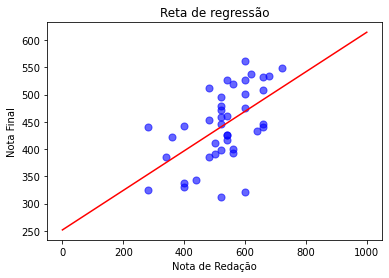

In [ ]:
plt.scatter(y=notas_colegiox.nota_final, x=notas_colegiox.NOTA_REDACAO, color='blue', s=50, alpha=0.6)
# X_plot = np.linspace(min(notas_colegiox.NOTA_REDACAO), max(notas_colegiox.NOTA_REDACAO), len(notas_colegiox.NOTA_REDACAO))
X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

### Teste de Normalidade dos resíduos

In [ ]:
# Residuos da nota redação
stats.shapiro(residuos)

(0.9587119221687317, 0.1417592167854309)

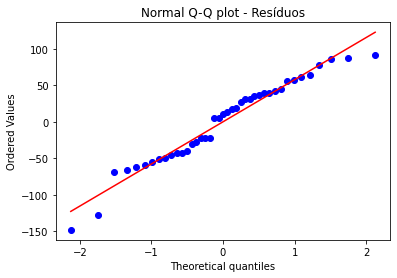

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

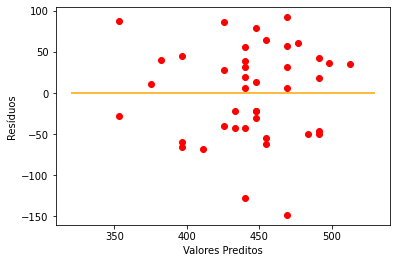

In [ ]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=320, xmax=530, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

### Regressão com Sklearn

In [ ]:
notas_colegiox.head()

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
37,46.3,537.1,557.3,447.2,340.0,385.58
44,505.9,451.9,529.8,534.5,720.0,548.42
52,449.4,506.4,45.8,436.4,560.0,399.60
65,468.6,59.5,576.6,606.1,520.0,446.16
79,414.3,510.6,49.5,553.7,640.0,433.62


In [ ]:
x = notas_colegiox.iloc[:, 4].values
y = notas_colegiox.iloc[:, 5].values

In [ ]:
correlacao2 = np.corrcoef (x, y)
correlacao2

array([[1.        , 0.55122032],
       [0.55122032, 1.        ]])

In [ ]:
x = x.reshape(-1,1) #transformando em matriz

In [ ]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressao2.intercept_

251.6788552750226

In [ ]:
regressao2.coef_

array([0.36274917])

In [ ]:
# coeficiente de determinação
regressao2.score(x,y)

0.30384384379611706

In [ ]:
# 
previsoes = regressao2.predict(x)
previsoes

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [ ]:
previsao = regressao2.predict([[800]])
previsao

array([541.87818801])